In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [151]:
!pip install geopandas
from shapely.geometry import Point #x-y coordinate city          # for plotting world map
import geopandas as gpd                                          # for plotting world map
from geopandas import GeoDataFrame  
import geopandas

Defaulting to user installation because normal site-packages is not writeable


In [125]:
df1=pd.read_csv('DS2_C6_S2_Cities_Data_Practice.csv')
df2=pd.read_csv('DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
df3=pd.read_csv('DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
df4=pd.read_csv('DS2_C6_S2_WorldCities_Data_Practice.csv')

In [126]:
df4.rename(columns={'city':'City'},inplace= True)
df4.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


Sorting by Population

In [127]:
df4.sort_values(by=['population'], ascending= False)

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
9469,Wé,We,-20.9000,167.2667,New Caledonia,NC,NCL,Province Îles,admin,NaN,1540672599
9470,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
9471,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477
9472,Kitamilo,Kitamilo,0.2222,33.2061,Uganda,UG,UGA,Buvuma,admin,NaN,1800610172


In [128]:
df4.nunique()

City          23927
city_ascii    23893
lat           23186
lng           24579
country         224
iso2            223
iso3            224
admin_name     4013
capital           3
population    20253
id            26569
dtype: int64

In [129]:
df4.drop_duplicates(subset='City',keep=False, inplace=True)
df4

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
5,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22120000.0,1156073548
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [130]:
df4.nunique()

City          22439
city_ascii    22423
lat           19549
lng           20713
country         217
iso2            216
iso3            217
admin_name     3899
capital           3
population    17672
id            22439
dtype: int64

Merging of all the datasets

In [131]:
from functools import reduce

In [132]:
df=[df1,df2,df3,df4]        # defined the list of all dataframes
final_df= reduce(lambda left,right:pd.merge(left,right, on=['City']),df)
final_df.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,...,Orlando,28.4772,-81.3369,United States,US,USA,Florida,NaN,1822394.0,1840015099
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,...,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,primary,693494.0,1578324706
2,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,...,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,primary,2011388.0,1218441993
3,Madrid,Spain,1.70,6.82,3.92,1.24,1193.48,1278.72,85.37,54.07,...,Madrid,40.4189,-3.6919,Spain,ES,ESP,Madrid,primary,3266126.0,1724616994
4,Manama,Bahrain,2.60,5.20,19.61,0.17,1078.72,1176.78,77.56,40.26,...,Manama,26.2167,50.5831,Bahrain,BH,BHR,Al ‘Āşimah,primary,157474.0,1048989486


In [133]:
# Also we can merge like this
'''n_df1=pd.merge(df1,df2, on='City')
n_df2=pd.merge(df3,df4, on='City')
final_df=pd.merge(n_df1,n_df2, on='City')'''

"n_df1=pd.merge(df1,df2, on='City')\nn_df2=pd.merge(df3,df4, on='City')\nfinal_df=pd.merge(n_df1,n_df2, on='City')"

In [134]:
final_df=final_df.drop(columns='country') # Here we remove the country column as it has duplicate as Country.

In [135]:
final_df.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Crime Rating,city_ascii,lat,lng,iso2,iso3,admin_name,capital,population,id
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,...,55.07,Orlando,28.4772,-81.3369,US,USA,Florida,NaN,1822394.0,1840015099
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,...,35.53,Oslo,59.9111,10.7528,NO,NOR,Oslo,primary,693494.0,1578324706
2,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,...,48.36,Quito,-0.2186,-78.5097,EC,ECU,Pichincha,primary,2011388.0,1218441993
3,Madrid,Spain,1.70,6.82,3.92,1.24,1193.48,1278.72,85.37,54.07,...,39.34,Madrid,40.4189,-3.6919,ES,ESP,Madrid,primary,3266126.0,1724616994
4,Manama,Bahrain,2.60,5.20,19.61,0.17,1078.72,1176.78,77.56,40.26,...,19.79,Manama,26.2167,50.5831,BH,BHR,Al ‘Āşimah,primary,157474.0,1048989486


In [136]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   119 non-null    object 
 1   Country                119 non-null    object 
 2   Cappuccino             119 non-null    float64
 3   Cinema                 119 non-null    float64
 4   Wine                   119 non-null    float64
 5   Gasoline               119 non-null    float64
 6   Avg Rent               119 non-null    float64
 7   Avg Disposable Income  119 non-null    float64
 8   Movehub Rating         119 non-null    float64
 9   Purchase Power         119 non-null    float64
 10  Health Care            119 non-null    float64
 11  Pollution              119 non-null    float64
 12  Quality of Life        119 non-null    float64
 13  Crime Rating           119 non-null    float64
 14  city_ascii             119 non-null    object 
 15  lat   

# Label Encoding

In [137]:
from sklearn import preprocessing #import as minmax_scale,StandardScaler,LabelEncoder
lbl_end=preprocessing.LabelEncoder()#object of labelencoding
final_df['City']=lbl_end.fit_transform(final_df['City'])
final_df['Country']=lbl_end.fit_transform(final_df['Country'])
final_df['city_ascii']=lbl_end.fit_transform(final_df['city_ascii'])
final_df['iso2']=lbl_end.fit_transform(final_df['iso2'])
final_df['iso3']=lbl_end.fit_transform(final_df['iso3'])
final_df['admin_name']=lbl_end.fit_transform(final_df['admin_name'])
final_df['capital']=lbl_end.fit_transform(final_df['capital'])

In [138]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   119 non-null    int32  
 1   Country                119 non-null    int32  
 2   Cappuccino             119 non-null    float64
 3   Cinema                 119 non-null    float64
 4   Wine                   119 non-null    float64
 5   Gasoline               119 non-null    float64
 6   Avg Rent               119 non-null    float64
 7   Avg Disposable Income  119 non-null    float64
 8   Movehub Rating         119 non-null    float64
 9   Purchase Power         119 non-null    float64
 10  Health Care            119 non-null    float64
 11  Pollution              119 non-null    float64
 12  Quality of Life        119 non-null    float64
 13  Crime Rating           119 non-null    float64
 14  city_ascii             119 non-null    int32  
 15  lat   

# Normalization (Data Scaling)

In [139]:
final_df.columns

Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id'],
      dtype='object')

In [140]:
A=final_df.drop(['lat','lng'],axis=1)
A.columns

Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'iso2', 'iso3', 'admin_name', 'capital', 'population',
       'id'],
      dtype='object')

In [141]:
B=final_df[['lat','lng']]
B.columns

Index(['lat', 'lng'], dtype='object')

In [142]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
SC=StandardScaler()
new_df=SC.fit_transform(A)
new_df

array([[ 0.727133  ,  1.48484017,  0.03971319, ...,  1.32224325,
        -0.35611106,  1.47201998],
       [ 0.75653457,  0.32681081,  1.80875509, ...,  0.44809355,
        -0.51641709,  0.51604495],
       [ 0.932944  , -0.73471611, -0.89535182, ...,  0.44809355,
        -0.32927354, -0.79863413],
       ...,
       [-1.56618963, -0.1074502 ,  0.78523799, ...,  0.44809355,
        -0.045818  , -0.13347977],
       [-1.53678805,  1.29183528, -0.14982702, ..., -1.30020586,
        -0.27034727,  1.30022797],
       [-1.50738648,  0.27855958,  0.34297751, ..., -1.30020586,
        -0.40646411,  0.42877736]])

In [143]:
new_data=pd.DataFrame(new_df,columns=A.columns)
new_data

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Pollution,Quality of Life,Crime Rating,city_ascii,iso2,iso3,admin_name,capital,population,id
0,0.727133,1.484840,0.039713,-0.107092,0.009117,-0.861875,0.157671,0.766021,0.857745,1.374518,...,0.905984,1.137081,0.832282,0.727133,1.476891,1.480001,-0.827198,1.322243,-0.356111,1.472020
1,0.756535,0.326811,1.808755,0.626728,1.254975,1.688191,1.321998,1.606574,0.517077,0.467050,...,-0.684215,0.646741,-0.336495,0.756535,0.585764,0.588504,0.442352,0.448094,-0.516417,0.516045
2,0.932944,-0.734716,-0.895352,-0.512623,-0.245246,-1.898714,-1.043198,-1.174370,-1.695787,-1.404113,...,-1.246705,-0.454530,0.430927,0.932944,-0.651912,-0.649686,0.535246,0.448094,-0.329274,-0.798634
3,0.315511,1.002328,-0.288823,0.022568,-0.925276,0.763442,0.180822,-0.018568,1.002899,0.543324,...,0.330037,0.141327,-0.108601,0.315511,-0.602405,-0.600158,-0.053082,0.448094,-0.151098,1.050462
4,0.344913,-1.458484,0.848418,-0.200888,3.147122,-2.234987,0.021731,-0.127402,-0.153892,-0.131898,...,-1.158275,0.317778,-1.277977,0.344913,-1.245997,-1.244017,-1.663244,0.448094,-0.592533,-1.417657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-1.624993,-1.554987,0.709422,0.657073,0.673575,-0.049216,0.442528,1.724835,1.287283,1.421456,...,-1.352436,1.545402,0.009832,-1.624993,-1.493532,-1.491655,0.999716,-1.300206,-0.423792,-1.463143
115,-1.595591,1.002328,-0.819536,-0.089160,-0.896726,0.623328,-0.764621,-0.473633,0.626683,0.084701,...,-0.730352,0.702602,0.170733,-1.595591,-0.602405,-0.600158,1.371291,-0.426056,-0.567340,1.051580
116,-1.566190,-0.107450,0.785238,-0.016054,1.376965,-0.385489,-0.834726,-0.911936,-0.621941,-1.062835,...,0.555340,-0.758665,0.334027,-1.566190,0.041187,0.043701,-1.663244,0.448094,-0.045818,-0.133480
117,-1.536788,1.291835,-0.149827,-0.468484,-0.530755,1.828304,-1.172249,-0.996834,-0.990751,-0.980204,...,-0.639615,-0.716991,0.201837,-1.536788,1.328370,1.331419,-1.601314,-1.300206,-0.270347,1.300228


In [144]:
Final_Data=pd.concat([new_data,B],axis=1)
Final_Data

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Crime Rating,city_ascii,iso2,iso3,admin_name,capital,population,id,lat,lng
0,0.727133,1.484840,0.039713,-0.107092,0.009117,-0.861875,0.157671,0.766021,0.857745,1.374518,...,0.832282,0.727133,1.476891,1.480001,-0.827198,1.322243,-0.356111,1.472020,28.4772,-81.3369
1,0.756535,0.326811,1.808755,0.626728,1.254975,1.688191,1.321998,1.606574,0.517077,0.467050,...,-0.336495,0.756535,0.585764,0.588504,0.442352,0.448094,-0.516417,0.516045,59.9111,10.7528
2,0.932944,-0.734716,-0.895352,-0.512623,-0.245246,-1.898714,-1.043198,-1.174370,-1.695787,-1.404113,...,0.430927,0.932944,-0.651912,-0.649686,0.535246,0.448094,-0.329274,-0.798634,-0.2186,-78.5097
3,0.315511,1.002328,-0.288823,0.022568,-0.925276,0.763442,0.180822,-0.018568,1.002899,0.543324,...,-0.108601,0.315511,-0.602405,-0.600158,-0.053082,0.448094,-0.151098,1.050462,40.4189,-3.6919
4,0.344913,-1.458484,0.848418,-0.200888,3.147122,-2.234987,0.021731,-0.127402,-0.153892,-0.131898,...,-1.277977,0.344913,-1.245997,-1.244017,-1.663244,0.448094,-0.592533,-1.417657,26.2167,50.5831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-1.624993,-1.554987,0.709422,0.657073,0.673575,-0.049216,0.442528,1.724835,1.287283,1.421456,...,0.009832,-1.624993,-1.493532,-1.491655,0.999716,-1.300206,-0.423792,-1.463143,-34.9289,138.6011
115,-1.595591,1.002328,-0.819536,-0.089160,-0.896726,0.623328,-0.764621,-0.473633,0.626683,0.084701,...,0.170733,-1.595591,-0.602405,-0.600158,1.371291,-0.426056,-0.567340,1.051580,38.3453,-0.4831
116,-1.566190,-0.107450,0.785238,-0.016054,1.376965,-0.385489,-0.834726,-0.911936,-0.621941,-1.062835,...,0.334027,-1.566190,0.041187,0.043701,-1.663244,0.448094,-0.045818,-0.133480,31.9500,35.9333
117,-1.536788,1.291835,-0.149827,-0.468484,-0.530755,1.828304,-1.172249,-0.996834,-0.990751,-0.980204,...,0.201837,-1.536788,1.328370,1.331419,-1.601314,-1.300206,-0.270347,1.300228,36.9081,30.6956


In [ ]:
K Value with Elbow method

Text(0, 0.5, 'Error')

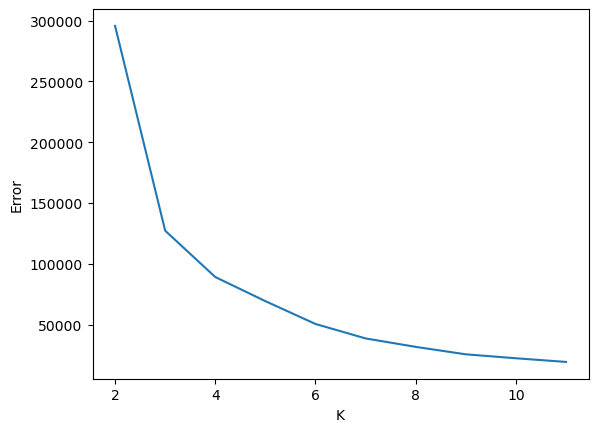

In [145]:
err=[]
for k in range(2,12):
    km=KMeans(n_clusters=k)
    km.fit(Final_Data)
    err.append(km.inertia_)
    #fig=plt.figure(figsize=(16,8))
plt.plot(range(2,12),err)
plt.xlabel('K')
plt.ylabel('Error')

For n_clusters = 2 The average silhouette_score is : 0.4669070712998204
For n_clusters = 3 The average silhouette_score is : 0.5700809002699903
For n_clusters = 4 The average silhouette_score is : 0.5294999908481139
For n_clusters = 5 The average silhouette_score is : 0.5220356250022473
For n_clusters = 6 The average silhouette_score is : 0.5125498233680674
For n_clusters = 7 The average silhouette_score is : 0.5622839621262006
For n_clusters = 8 The average silhouette_score is : 0.5192965429140086
For n_clusters = 9 The average silhouette_score is : 0.5138467154833425
For n_clusters = 10 The average silhouette_score is : 0.4386138936885408
For n_clusters = 11 The average silhouette_score is : 0.4366805717669083
For n_clusters = 12 The average silhouette_score is : 0.44555328153452806


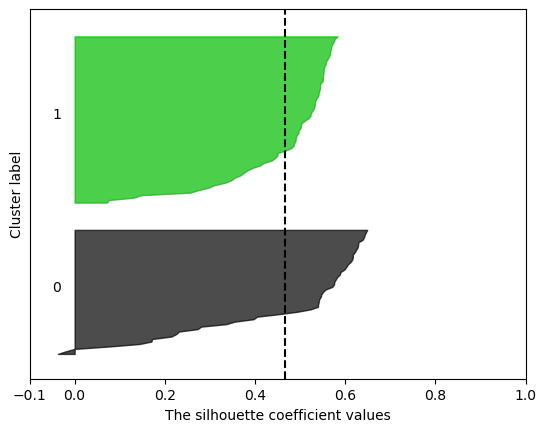

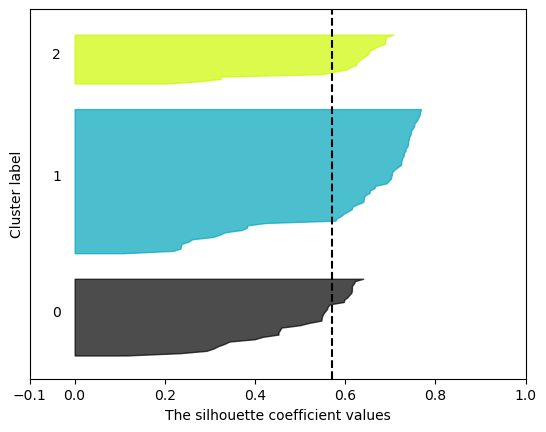

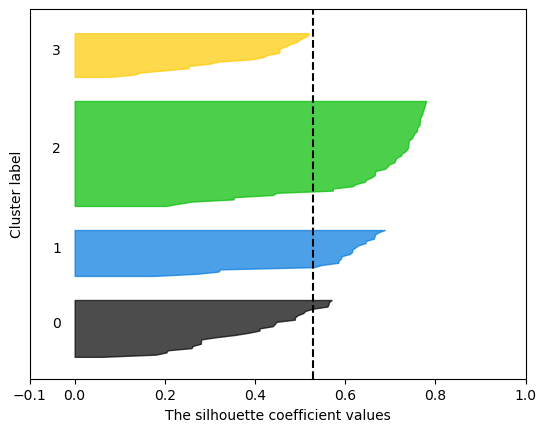

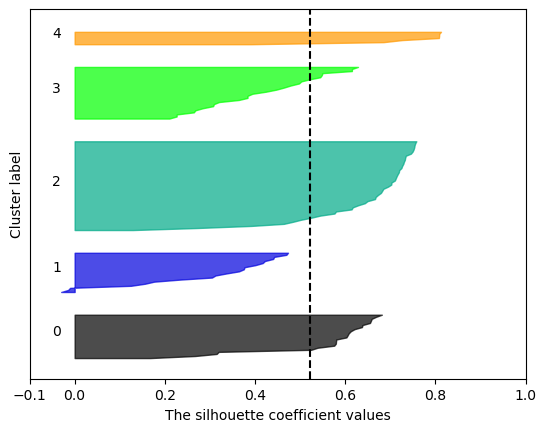

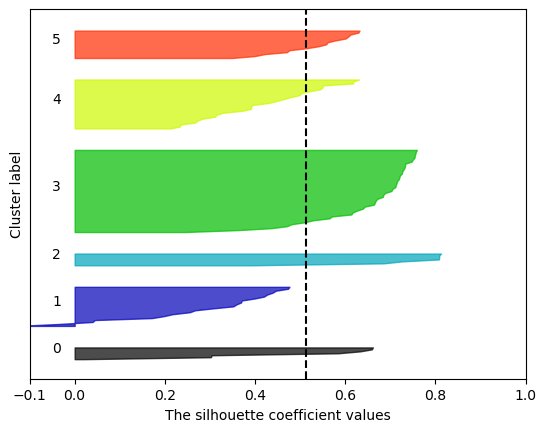

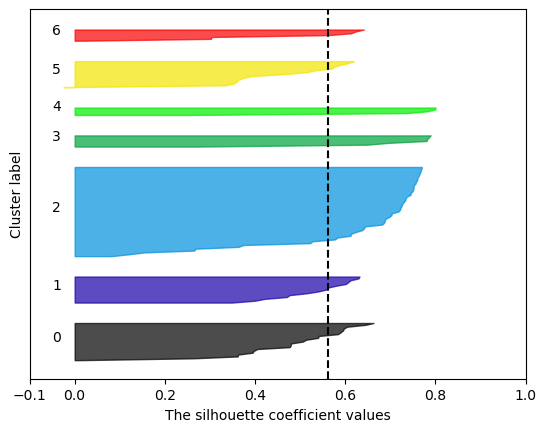

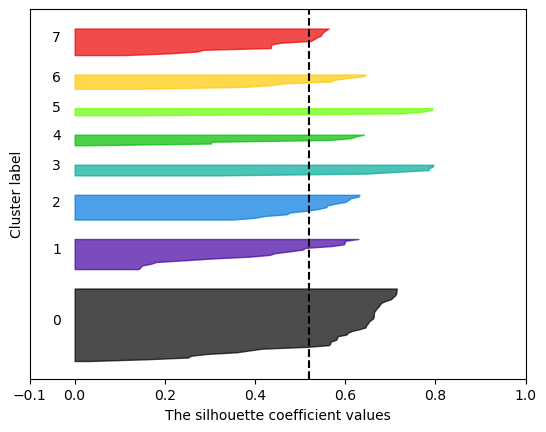

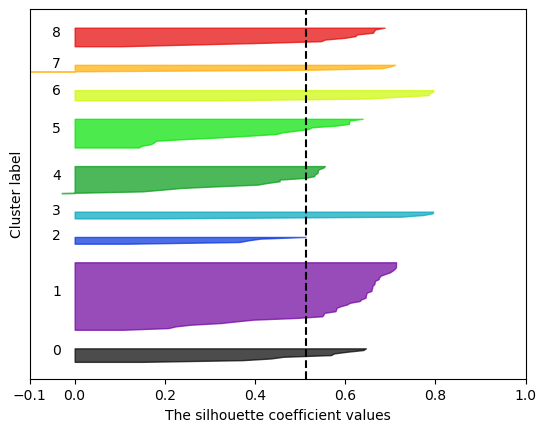

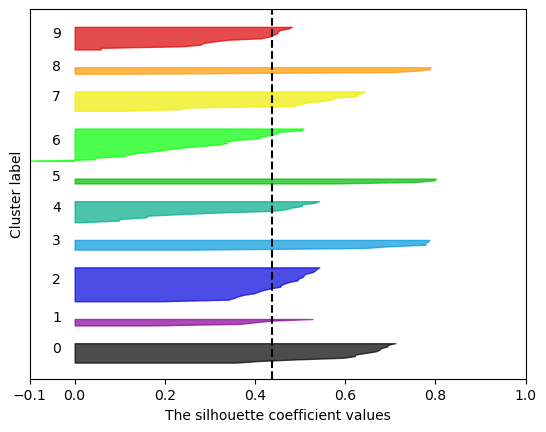

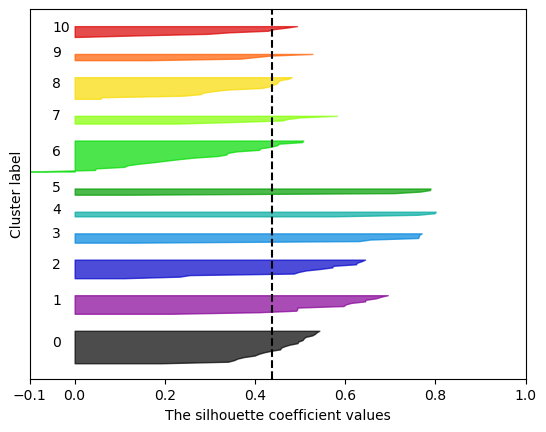

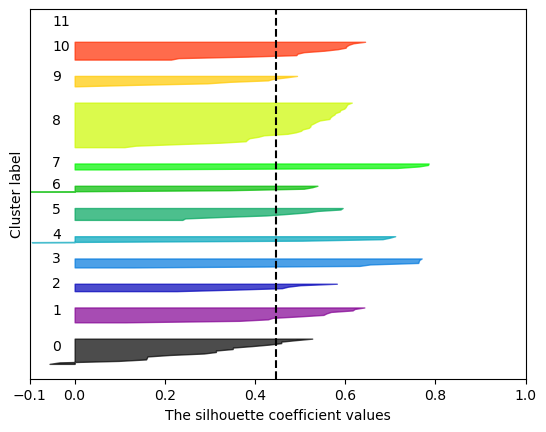

In [147]:
#optimum value of k using silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for n_clusters in range_n_clusters:
 # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Final_Data) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Final_Data)
    silhouette_avg = silhouette_score(Final_Data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Final_Data, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
     # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [162]:
KM=KMeans(n_clusters=3)
KM.fit(Final_Data)
KM.cluster_centers_
KM.labels_

array([2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1])

In [149]:
KM.cluster_centers_

array([[ 5.08968391e-02,  4.18988215e-02,  1.13322979e-01,
         1.21071940e-01, -2.22132946e-01,  3.85802681e-01,
        -1.16142788e-01,  9.67280940e-02,  9.47089421e-02,
         1.04895095e-01,  5.52280261e-02, -8.18746574e-03,
         2.23373782e-01, -2.41228208e-01,  5.08968391e-02,
        -1.08906268e-01, -1.00951221e-01, -3.14561465e-02,
        -1.62423708e-01, -4.12497361e-01,  6.72458252e-02,
         3.92205730e+01,  1.97944746e+01],
       [-3.89699981e-03,  2.61013685e-01,  3.39695430e-02,
        -5.77481563e-02,  1.09281256e-01, -7.48510007e-01,
         1.22292195e-01,  1.98031044e-01,  7.89205143e-02,
         3.44593633e-01, -3.01275907e-01, -4.03024238e-02,
         1.16882213e-01,  7.67628327e-01, -3.89699981e-03,
         4.05738464e-01,  4.15157850e-01, -1.19233987e-01,
         4.48093547e-01,  3.13670195e-02,  3.46223633e-01,
         2.36744682e+01, -8.39472455e+01],
       [-9.17872607e-02, -2.46527260e-01, -2.31961107e-01,
        -1.86972729e-01,  3.4

# For k=3

<Axes: >

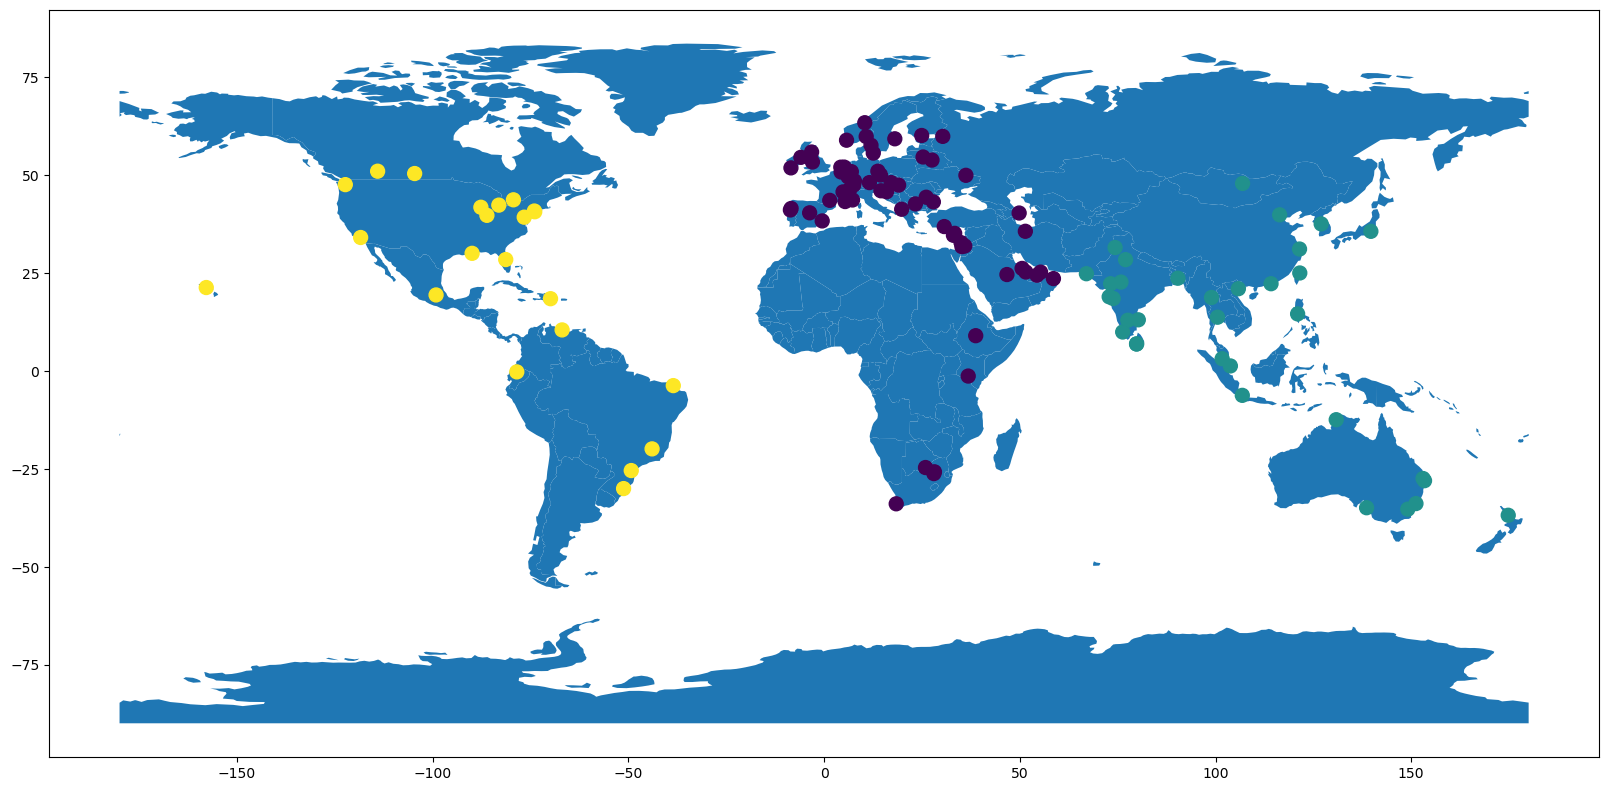

In [163]:
#for k=3
#plot clustered data onto map
k_label=KM.labels_
geometry=[Point(xy) for xy in zip(Final_Data['lng'],Final_Data['lat'])]
#longitude capture in x and latitude in y
gdf=GeoDataFrame(Final_Data,geometry=geometry)
#this is a simple map that goes with geopandas
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

gdf.plot(ax=world.plot(figsize=(20,10)),marker="o",c=k_label.astype(float),markersize=100)

# For K=2

In [178]:
KM=KMeans(n_clusters=2)
KM.fit(Final_Data)
KM.cluster_centers_
k_label2=KM.labels_

<Axes: >

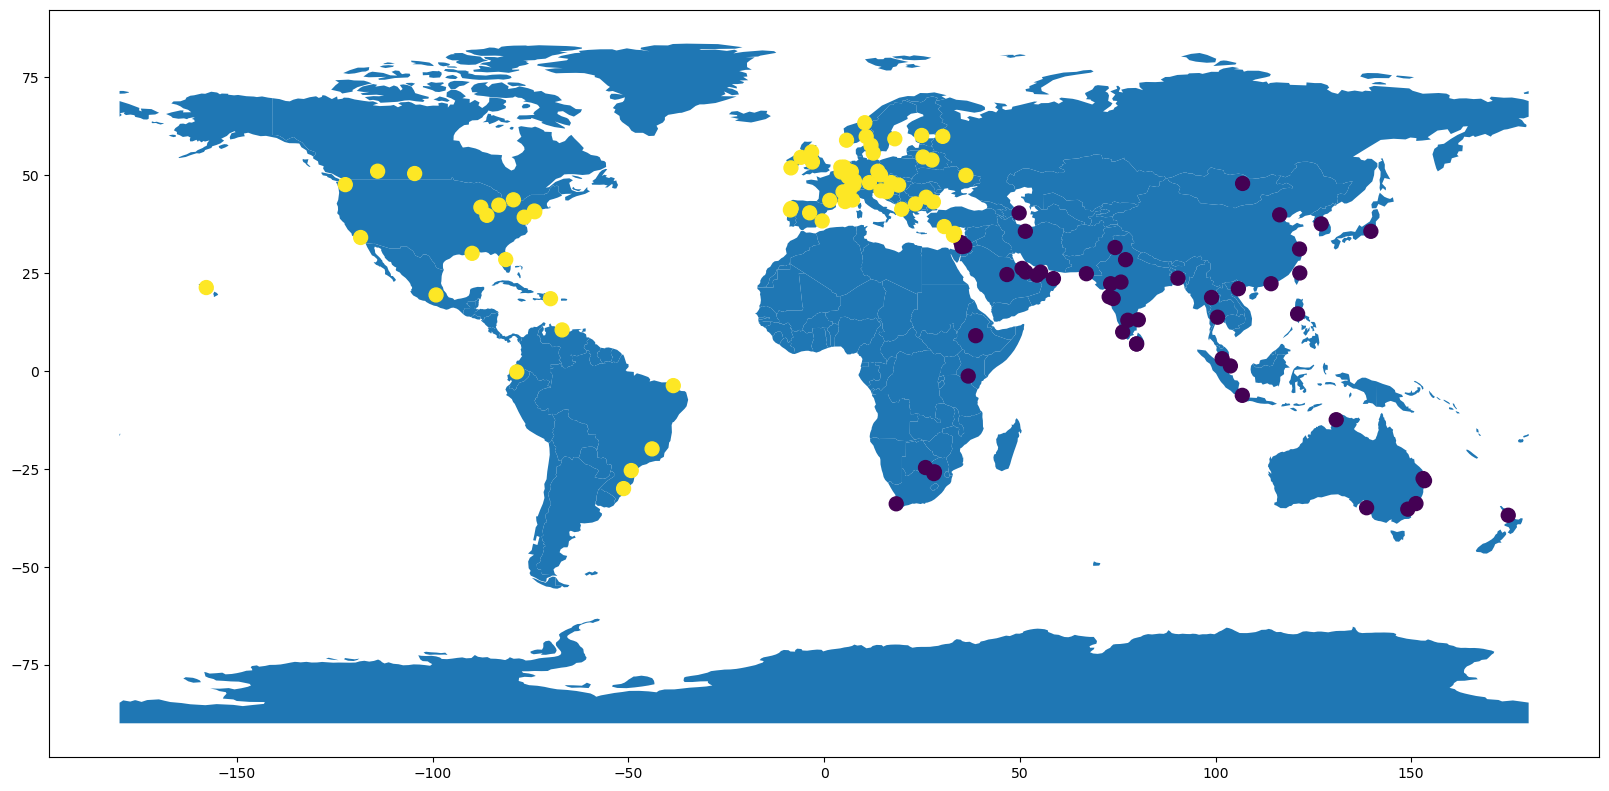

In [179]:
#for k=2
#plot clustered data onto map
geometry=[Point(xy) for xy in zip(Final_Data['lng'],Final_Data['lat'])]
#longitude capture in x and latitude in y
gdf=GeoDataFrame(Final_Data,geometry=geometry)
#this is a simple map that goes with geopandas
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

gdf.plot(ax=world.plot(figsize=(20,10)),marker="o",c=k_label2.astype(float),markersize=100)

# For K=4

In [176]:
KM=KMeans(n_clusters=4)
KM.fit(Final_Data)
KM.cluster_centers_
k_label3=KM.labels_

<Axes: >

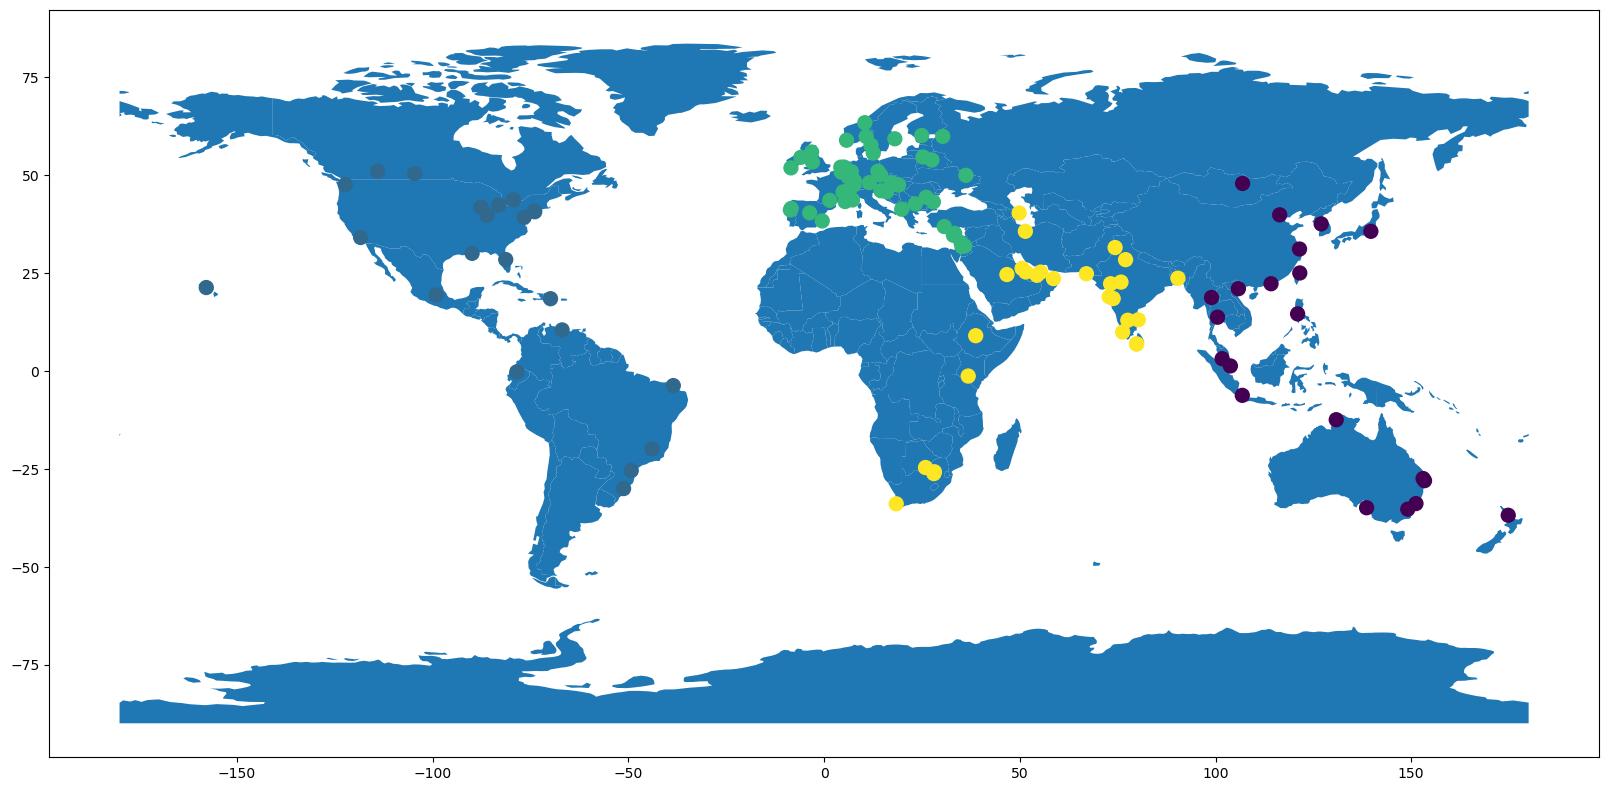

In [177]:
#for k=4
#plot clustered data onto map
geometry=[Point(xy) for xy in zip(Final_Data['lng'],Final_Data['lat'])]
#longitude capture in x and latitude in y
gdf=GeoDataFrame(Final_Data,geometry=geometry)
#this is a simple map that goes with geopandas
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

gdf.plot(ax=world.plot(figsize=(20,10)),marker="o",c=k_label3.astype(float),markersize=100)